
first five entries in the data set 
   invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card   05-08-2022          Kanyon  
1     Debit Card   12-12-2021  Forum Istanbul  
2           Cash   09-11-2021       Metrocity  
3    Credit Card   16-05-2021    Metropol AVM  
4           Cash   24-10-2021          Kanyon  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   cust

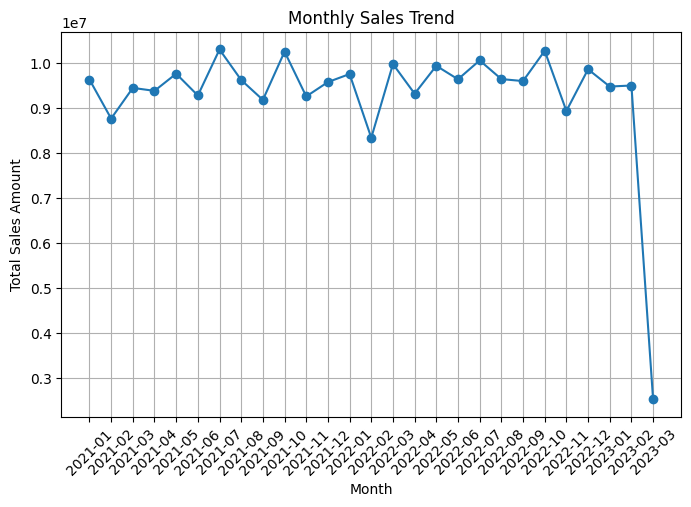

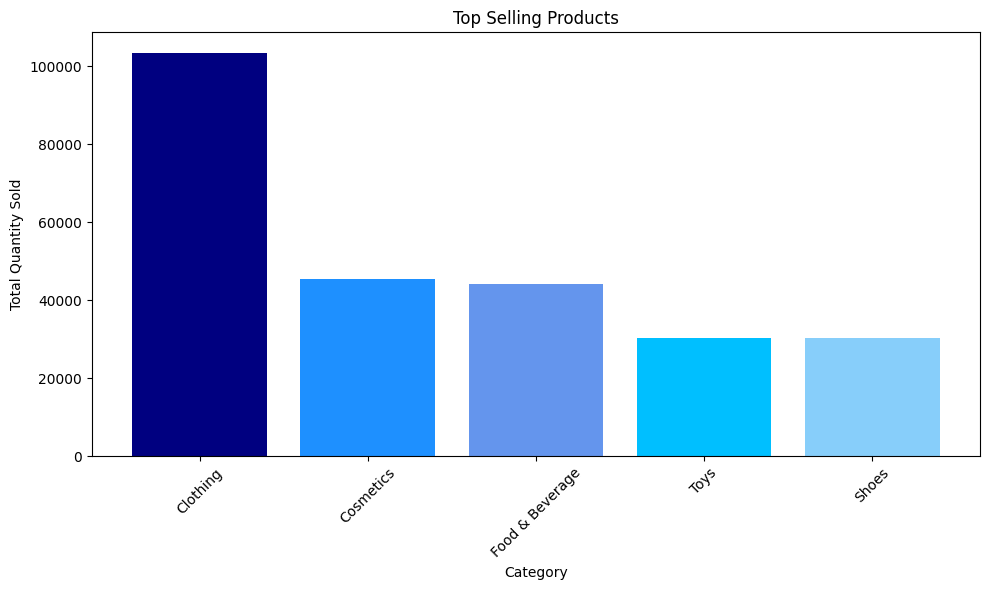

gender
Female    1.502071e+08
Male      1.012987e+08
Name: total_amount, dtype: float64


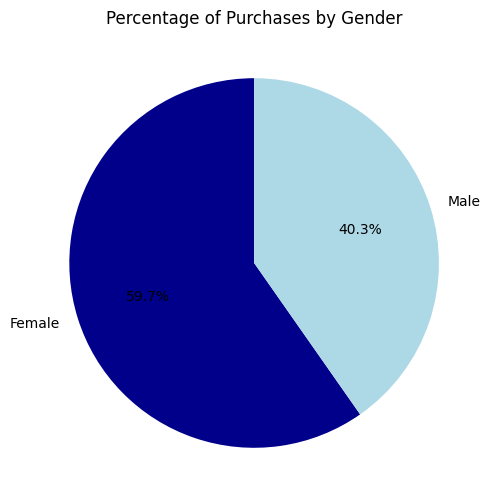

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/customer_sales_data.csv')
print("\nfirst five entries in the data set \n" ,df.head())
print("\ninformation of the dataset :\n" , df.info())
print("\nDescriptiion of the data set :\n" , df.describe())
print("\nshape of the data set is\n" , df.shape)


top_products = df.groupby('category')['quantity'].sum().sort_values(ascending=False).head(5)
print("\ntop selling products:\n" , top_products)

unique_customers = df['customer_id'].nunique()
print("Total unique customers:", unique_customers)


female_df = df[df['gender'] == 'Female']
female_preferred_product = female_df.groupby('category')['quantity'].sum().sort_values(ascending = False).head(3)
print("\n Female preferred product\n" , female_preferred_product)

male_df = df[df['gender'] == 'Male']
male_preferred_product = male_df.groupby('category')['quantity'].sum().sort_values(ascending = False).head(3)
print("\n Male preferred product\n" , male_preferred_product)

df['total_amount'] = df['quantity'] * df['price']
customer_total = df.groupby('customer_id')['total_amount'].sum()
average_spending = customer_total.mean()
print("\nAverage spending per customer:", round(average_spending, 2))


top_customers = df.groupby('customer_id')['total_amount'].sum().sort_values(ascending=False).head(10)
print("\n top customers: " , top_customers)


df['invoice_date'] = pd.to_datetime(df['invoice_date'] , format='%d-%m-%Y',errors ='coerce')

df['Month_Year'] = df['invoice_date'].dt.to_period('M')  # Example: 2025-11

monthly_sales = df.groupby('Month_Year')['total_amount'].sum().reset_index()



plt.figure(figsize=(8,5))
plt.plot(monthly_sales['Month_Year'].astype(str), monthly_sales['total_amount'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

colors = ['#000080', '#1E90FF', '#6495ED', '#00BFFF', '#87CEFA']
plt.figure(figsize=(10, 6)) # Add a figure for the bar plot
plt.bar(top_products.index, top_products.values, color = colors)
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.title('Top Selling Products')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


gender_sales = df.groupby('gender')['total_amount'].sum()

print(gender_sales)

plt.figure(figsize=(6,6))
plt.pie(gender_sales, labels=gender_sales.index, autopct='%1.1f%%', startangle=90, colors=['darkblue' ,'lightblue'])
plt.title('Percentage of Purchases by Gender')
plt.show()